In [19]:
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

Epoch 1/15
14/14 [==============================] - 6s 196ms/step - loss: 37.5957 - accuracy: 0.4787 - val_loss: 1.3670 - val_accuracy: 0.4286
Epoch 2/15
14/14 [==============================] - 3s 179ms/step - loss: 0.9283 - accuracy: 0.4809 - val_loss: 0.7087 - val_accuracy: 0.4286
Epoch 3/15
14/14 [==============================] - 3s 196ms/step - loss: 0.6971 - accuracy: 0.5326 - val_loss: 0.6971 - val_accuracy: 0.4464
Epoch 4/15
14/14 [==============================] - 2s 170ms/step - loss: 0.7078 - accuracy: 0.5348 - val_loss: 0.6938 - val_accuracy: 0.5446
Epoch 5/15
14/14 [==============================] - 2s 168ms/step - loss: 0.7250 - accuracy: 0.5416 - val_loss: 0.7755 - val_accuracy: 0.4286
Epoch 6/15
14/14 [==============================] - 2s 170ms/step - loss: 0.6946 - accuracy: 0.5213 - val_loss: 0.7169 - val_accuracy: 0.5625
Epoch 7/15
14/14 [==============================] - 2s 166ms/step - loss: 0.6939 - accuracy: 0.4966 - val_loss: 0.6722 - val_accuracy: 0.6339
Epoch

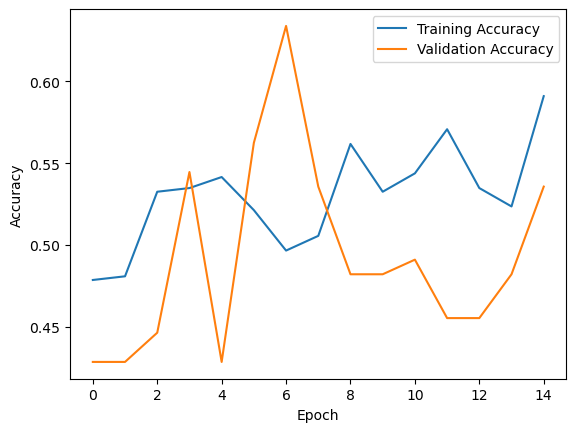

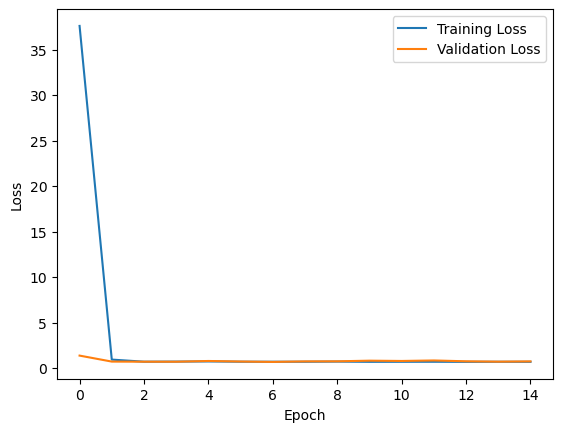

5/5 [==============================] - 1s 40ms/step - loss: 0.7387 - accuracy: 0.4929
Test Accuracy: 0.4928571283817291
5/5 [==============================] - 0s 40ms/step


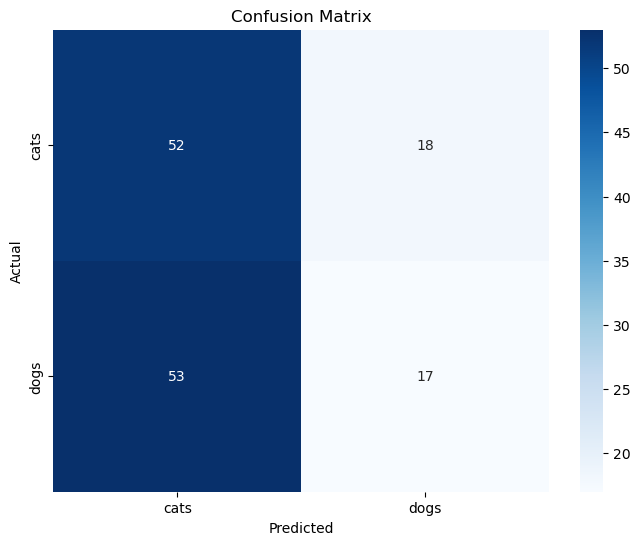

1/1 [==============================] - 0s 59ms/step


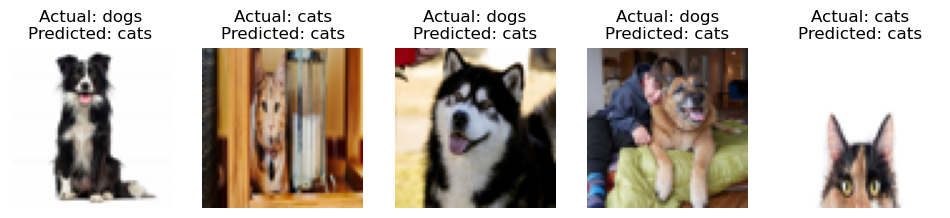

In [21]:
# Function to load and preprocess images
def load_images(folder_path):
    images = []
    labels = []
    for filename in os.listdir(folder_path):
        img = Image.open(os.path.join(folder_path, filename))
        img = img.resize((64, 64)).convert('RGB')  # Resize images to a common size and convert to RGB
        img_array = np.array(img)
        images.append(img_array)
        labels.append(folder_path.split("\\")[-1])  # Extract label from folder path
    return images, labels

# Load and preprocess training data
dogs_path_train = "C:\\Users\\glchu\\Downloads\\archive\\train\\dogs"
cats_path_train = "C:\\Users\\glchu\\Downloads\\archive\\train\\cats"

dog_images_train, dog_labels_train = load_images(dogs_path_train)
cat_images_train, cat_labels_train = load_images(cats_path_train)

# Combine dog and cat data
X_train_dogs, y_train_dogs = load_images(dogs_path_train)
X_train_cats, y_train_cats = load_images(cats_path_train)

X_train = np.concatenate([np.array(X_train_dogs), np.array(X_train_cats)], axis=0)
y_train = np.concatenate([y_train_dogs, y_train_cats], axis=0)

# Label encoding for categorical labels
le = LabelEncoder()
y_train = le.fit_transform(y_train)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train)

# Create a more complex CNN model
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))  # Add dropout layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with augmented data
history = model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=15, validation_data=(X_val, y_val))

# Visualize training and validation accuracy/loss
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Load and preprocess test data
dogs_path_test = "C:\\Users\\glchu\\Downloads\\archive\\test\\dogs"
cats_path_test = "C:\\Users\\glchu\\Downloads\\archive\\test\\cats"

dog_images_test, dog_labels_test = load_images(dogs_path_test)
cat_images_test, cat_labels_test = load_images(cats_path_test)

# Combine dog and cat test data
X_test = np.array(dog_images_test + cat_images_test)
y_test = np.array(dog_labels_test + cat_labels_test)

# Label encoding for categorical labels
y_test = le.transform(y_test)

# ...

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc}')

# Plot confusion matrix
y_pred = (model.predict(X_test) > 0.5).astype("int32")
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot sample predictions
sample_indices = np.random.choice(len(X_test), size=5, replace=False)
sample_images = X_test[sample_indices]
sample_labels = y_test[sample_indices]

sample_predictions = (model.predict(sample_images) > 0.5).astype("int32")

plt.figure(figsize=(12, 6))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(sample_images[i])
    plt.title(f'Actual: {le.classes_[sample_labels[i]]}\nPredicted: {le.classes_[sample_predictions[i][0]]}')
    plt.axis('off')
plt.show()
